<a href="https://colab.research.google.com/github/dana0726/web1/blob/master/Evaluating_a_PoS_Tagger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m spacy download fr_core_news_sm

2022-10-04 18:53:47.212177: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.3 MB 8.7 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [ ]:
# setting

from itertools import chain
import spacy
fr_model = spacy.load('fr_core_news_sm')
from spacy.tokens import Doc
from random import sample

In [ ]:
# refercene cell

# Spacy predicts pos of tokenized sent
def predict_pos(sentence, model): #String -> list
  model.tokenizer = lambda x: Doc(model.vocab, x.split())
  return [token.pos_ for token in model(sentence)] # reto list of pos
    
print(predict_pos("J' aime le chocolat", fr_model)) 


['PRON', 'VERB', 'DET', 'NOUN']


In [ ]:
# Exo 3

def spacy_predicts(sentences): # ls.sentences ==> ls.pose(ls in ls)
  poses = [] 
  for sentence in sentences:
    pos = predict_pos(sentence, model = fr_model)
    poses.append(pos)
  return poses
 
# print( spacy_predicts(sentences))

In [ ]:
#example set 01
test_sent = ["tu me dit quelque chose.", "Trop du boulot?", "L'art est partout."]
test_p = spacy_predicts(test_sent)
# print(test_p)
test_g = [['VERB', 'PRON', 'VERB', 'DET', 'NOUN'], ['ADV', 'ADP', 'NOUN'], ['DET', 'AUX', 'ADJ']]

# #example set 01
# test_sent = ["cela signifie que leur consommation énergétique , qui représente actuellement 10 % de la consommation énergétique moyenne de l' UE , enregistrera une forte augmentation à mesure qu' ils exigeront des commodités élémentaires comme l' eau chaude et , peut-être même , l' air conditionné , des moyens de transport et la modernisation de leurs industries ."]
# test_p =  spacy_predicts(test_sent)
# # print(test_p)
# test_g = [['PRON', 'VERB', 'SCONJ', 'DET', 'NOUN', 'ADJ', 'PUNCT', 'PRON', 'VERB', 'ADV', 'NUM', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADJ', 'ADJ', 'ADP', 'DET', 'PROPN', 'PUNCT', 'VERB', 'DET', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'SCONJ', 'PRON', 'VERB', 'DET', 'NOUN', 'ADJ', 'ADP', 'DET', 'NOUN', 'ADJ', 'CCONJ', 'PUNCT', 'ADV', 'ADV', 'PUNCT', 'DET', 'NOUN', 'ADJ', 'PUNCT', 'DET', 'NOUN', 'ADP', 'NOUN', 'CCONJ', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'PUNCT']]


In [ ]:
# Exo 5-1

def calculate_sent_accuracy(pred_poses, golden_poses):
  nb_corr = 0
  # print(list(zip(pred_poses, golden_poses)))
  for pred_pos, golden_pos in zip(pred_poses, golden_poses): 
   if pred_pos == golden_pos :
      nb_corr += 1
  
  # print(nb_corr)
  # print(len(pred_poses))
  accuracy = nb_corr / len(pred_poses)
  return round(accuracy,3) 

print(calculate_sent_accuracy(spacy_predicts(test_sent), test_g))


0.667


In [ ]:
# Exo 5-2

def calculate_micro_accuracy(pred_poses, golden_poses):
  nb_wd_total = 0
  nb_corr = 0

  for pred_pos, golden_pos in zip(pred_poses, golden_poses): # for list in iterable(tuples of list)
    for pred_lable, golden_label in zip(pred_pos, golden_pos) : # for element in list
      if pred_lable == golden_label:
        nb_corr += 1
  nb_wd_total = len(list(chain.from_iterable(golden_poses)))
  # print(nb_corr)
  # print(nb_wd_total)
  accuracy = nb_corr / nb_wd_total

  # print(list(zip(pred_poses, golden_poses)))
  
  return round(accuracy,3)
  
print(calculate_micro_accuracy(spacy_predicts(test_sent), test_g))


0.818


In [ ]:
# Exo 5-3

def calculate_macro_accuracy(pred_poses, golden_poses):
  nb_pos = 0
  nb_corr = 0
  # all_poss_poses = ["NOUN"] # test
  dico_pos_acc = {}

  #collect only correct pairs and make into a list 
  correct_pairs = []
  for pred_pos, golden_pos in zip(pred_poses, golden_poses): # for list in iterable(tuples of list)
    # print(list(zip(pred_poses, golden_poses)))
    for pred_lable, golden_label in zip(pred_pos, golden_pos) :  # for element in list
      if pred_lable == golden_label:
        correct_pairs.append((pred_lable, golden_label))

  # print(correct_pairs)
  # print(len(correct_pairs))
  
 

  # calculate nb_pos
  
  all_poss_poses = ["PRON", "VERB", "SCONJ", "DET", "NOUN", "ADJ", "PUNCT", "ADV", "NUM", "ADP", "AUX", "PROPN"]
  for pos in all_poss_poses:
  
    # calculate nb_corr
    for a,b in correct_pairs:
      if a == pos:
        nb_corr += 1
  
    for pred_pos, golden_pos in zip(pred_poses, golden_poses):
      nb_pos += golden_pos.count(pos)
    
  # #make dico mapping each pos and it's average of accuracy
    dico_pos_acc[pos] = nb_corr / nb_pos

  # # calculate average of each label's accuracy, which corresponds to accuracy
  accuracy = sum(list(dico_pos_acc.values()))/len(list(all_poss_poses))

  # # print(nb_corr)
  # print(nb_pos)
  # # print(dico_pos_acc)
  
  return round(accuracy,3)

print(calculate_macro_accuracy(spacy_predicts(test_sent), test_g))
  


0.846


In [ ]:
# Exo 7

import json
corpus = json.load(open("sequoia.test.json", "r"))
#corpus is a list of dictionaries, each dictionary contains two keys, tokenized_sentence and gold_tags

nb_sent_total = len(corpus)
print("%d sentences" %(nb_sent_total))
nb_wd_total = 0

for i in range(len(corpus)):
  nb_wd = len(corpus[i]['gold_labels'])
  nb_wd_total += nb_wd
print("%d words" %(nb_wd_total))

456 sentences
10044 words


In [ ]:
# Exo 8

import json
corpus = json.load(open("sequoia.test.json", "r"))
# print(corpus)

# convert corpus Sequoia to put in Spacy 

sentences = [] # list of sent of Seqa (aka question sheet)
space = ' '
for i in range(len(corpus)):
  sentences.append(space.join(corpus[i]["tokenized_sentence"]))
# print(sentences)

tagging_by_spacy = spacy_predicts(sentences) # tag done by Spacy(ls-in-ls) (aka Spacy'answer)
# print(spacy_predicts(sentences))

golden_tagging = [] # tag done by Seqa (ls-in-ls) (aka answer sheet)
for i in range(len(corpus)):
  golden_tagging.append((corpus[i]["gold_labels"]))

sent_n_golden_tagging = list(zip(sentences,golden_tagging)) # list of (sent"", golden poses[])

# dico mapping sentence to it's golden label (aka Q and A)
sent2golden = dict(sent_n_golden_tagging) 
# print(sent2golden["Ceci peut contribuer à maintenir le flux sanguin vers le coeur chez les patients atteints d' angor ou d' une crise cardiaque et à améliorer l' efficacité de leur ICP ."])


print(calculate_sent_accuracy(tagging_by_spacy,golden_tagging))
print(calculate_micro_accuracy(tagging_by_spacy,golden_tagging))
print(calculate_macro_accuracy(tagging_by_spacy,golden_tagging))


0.59
0.943
0.938


In [ ]:
# Exo 10
# calculate error rate

def calculate_sent_err_rate(pred_poses, golden_poses):
  nb_err = 0
  for pred_pos, golden_pos in zip(pred_poses, golden_poses): 
    # print(pred_pos, golden_pos)
    if pred_pos != golden_pos :
      nb_err += 1
  
  err_rate = nb_err / len(pred_poses)
  return round(err_rate,3) 


def calculate_micro_err_rate(pred_poses, golden_poses):
  nb_wd_total = 0
  nb_err = 0

  for pred_pos, golden_pos in zip(pred_poses, golden_poses): # for list in iterable(tuples of list)
    for pred_lable, golden_label in zip(pred_pos, golden_pos) : # for element in list
      if pred_lable != golden_label:
        nb_err += 1
  nb_wd_total = len(list(chain.from_iterable(golden_poses)))
  err_rate = nb_err / nb_wd_total
  return round(err_rate,3)

# Exo 5-3

def calculate_macro_err_rate(pred_poses, golden_poses):
  nb_pos = 0
  nb_err = 0
  # all_poss_poses = ["NOUN"] # test
  dico_pos_acc = {}

  #collect only correct pairs and make into a list 
  incorrect_pairs = []
  for pred_pos, golden_pos in zip(pred_poses, golden_poses): # for list in iterable(tuples of list)
    # print(list(zip(pred_poses, golden_poses)))
    for pred_lable, golden_label in zip(pred_pos, golden_pos) :  # for element in list
      if pred_lable != golden_label:
        incorrect_pairs.append((pred_lable, golden_label))
  
  all_poss_poses = ["PRON", "VERB", "SCONJ", "DET", "NOUN", "ADJ", "PUNCT", "ADV", "NUM", "ADP", "AUX", "PROPN"]
  for pos in all_poss_poses:
  
    # calculate nb_err
    for a,b in incorrect_pairs:
      if a == pos:
        nb_err += 1
  
    for pred_pos, golden_pos in zip(pred_poses, golden_poses):
      nb_pos += golden_pos.count(pos)
    
  # #make dico mapping each pos and it's average of accuracy
    dico_pos_acc[pos] = nb_err / nb_pos

  # # calculate average of each label's accuracy, which corresponds to accuracy
  err_rate = sum(list(dico_pos_acc.values()))/len(list(all_poss_poses))

  return round(err_rate,3)


# print(calculate_sent_err_rate(test_p, test_g))  
# print(calculate_micro_err_rate(test_p, test_g))
# print(calculate_macro_err_rate(test_p, test_g))

In [ ]:
#draw only 10 Q

sentences = [] # list of sent of Seqa (aka question sheet)
space = ' '
for i in range(len(corpus)):
  sentences.append(space.join(corpus[i]["tokenized_sentence"]))
ten_sentences = sample(sentences,10)
print(ten_sentences)

golden_tagging = []
for sent in ten_sentences:
  golden_tagging.append(sent2golden[sent])

print(calculate_sent_err_rate(spacy_predicts(ten_sentences), golden_tagging))
print(calculate_micro_err_rate(spacy_predicts(ten_sentences), golden_tagging))
print(calculate_macro_err_rate(spacy_predicts(ten_sentences), golden_tagging))


["Chez les patients ayant eu une fracture de hanche récente secondaire à un traumatisme modéré , il est recommandé de réaliser l' administration d' Aclasta 2 semaines ou plus après l' intervention sur la fracture ( voir rubrique 5.1 ) .", 'Le premier retour de familles ( adultes , femmes , enfants ) a lieu par la " traversée de le Beach " ( navette fluviale qui effectue les liaisons Brazzaville-Kinshasa ) , et comprend environ 1500 personnes , sous le contrôle de le HCR .', "Pas moins d' une douzaine d' hommes étaient mobilisés dont l' équipe cynophile .", 'À le moins une nouvelle fracture vertébrale ( 0-3 ans )', 'Dernier élément non négligeable et pourtant souvent " oublié par la presse " .', "Mais l' introduction effective de l' euro en 2002 va se traduire par une transparence et une concurrence telles que les marchés nationaux vont devoir s' adapter plus rapidement que prévu .", "- La substance active est l' acide zolédronique .", "Cette visite s' inscrivait dans le cadre de la neu

In [ ]:
# Exo 9

def partial_evaluation(n, corpus, eval_func): # select n% of corpus and evaluate with the func choosen
  
  #select n% of question sheet (aka part test question)
  sentences = [] 
  space = ' '
  for i in range(len(corpus)):
    sentences.append(space.join(corpus[i]["tokenized_sentence"]))
    partial_sentences = sample(sentences, round(len(sentences) * (n/100)))
  
  
  # print(partial_sentences) 

  tagging_by_spacy = spacy_predicts(partial_sentences) # tag done by Spacy(ls-in-ls) (aka Spacy'answer)


  golden_tagging = [] # answer sheet for part test
  for sent in partial_sentences : 
    golden_tagging.append(sent2golden[sent])
  # print(golden_tagging)
  
  res = eval_func(tagging_by_spacy, golden_tagging) # pred-poses, g-poses
  return res
  

# print(partial_evaluation(10, corpus = json.load(open("sequoia.test.json", "r")), eval_func = calculate_macro_err_rate))
# print(partial_evaluation(20, corpus = json.load(open("sequoia.test.json", "r")), eval_func = calculate_sent_err_rate))
# print(partial_evaluation(30, corpus = json.load(open("sequoia.test.json", "r")), eval_func = calculate_sent_err_rate))
# print(partial_evaluation(40, corpus = json.load(open("sequoia.test.json", "r")), eval_func = calculate_sent_err_rate))
# print(partial_evaluation(50, corpus = json.load(open("sequoia.test.json", "r")), eval_func = calculate_sent_err_rate))
# print(partial_evaluation(60, corpus = json.load(open("sequoia.test.json", "r")), eval_func = calculate_sent_err_rate))
# print(partial_evaluation(70, corpus = json.load(open("sequoia.test.json", "r")), eval_func = calculate_sent_err_rate))
# print(partial_evaluation(80, corpus = json.load(open("sequoia.test.json", "r")), eval_func = calculate_sent_err_rate))
# print(partial_evaluation(90, corpus = json.load(open("sequoia.test.json", "r")), eval_func = calculate_sent_err_rate))

# Exo 10

# err_rates = []
# for i in range(1000):
#  err_rates.append(partial_evaluation(50, corpus = json.load(open("sequoia.test.json", "r")), eval_func = calculate_macro_err_rate))
# print(err_rates)

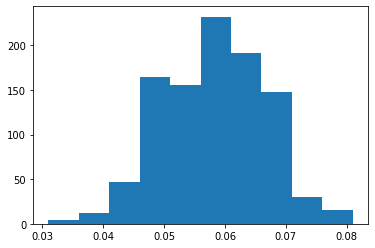

In [ ]:
import matplotlib.pyplot as plt

err_rates = [0.058, 0.06, 0.049, 0.054, 0.062, 0.04, 0.063, 0.056, 0.063, 0.05, 0.064, 0.072, 0.06, 0.056, 0.06, 0.045, 0.05, 0.057, 0.059, 0.058, 0.046, 0.071, 0.047, 0.076, 0.055, 0.052, 0.052, 0.046, 0.052, 0.063, 0.06, 0.064, 0.057, 0.076, 0.061, 0.056, 0.047, 0.068, 0.05, 0.049, 0.057, 0.058, 0.056, 0.063, 0.05, 0.063, 0.053, 0.056, 0.072, 0.053, 0.061, 0.05, 0.054, 0.051, 0.061, 0.058, 0.049, 0.071, 0.059, 0.059, 0.047, 0.066, 0.056, 0.07, 0.049, 0.051, 0.057, 0.057, 0.073, 0.061, 0.058, 0.068, 0.067, 0.064, 0.061, 0.057, 0.052, 0.063, 0.059, 0.068, 0.064, 0.066, 0.053, 0.04, 0.065, 0.055, 0.068, 0.063, 0.055, 0.073, 0.063, 0.041, 0.057, 0.053, 0.07, 0.064, 0.057, 0.07, 0.05, 0.061, 0.06, 0.057, 0.067, 0.073, 0.053, 0.062, 0.054, 0.066, 0.068, 0.058, 0.057, 0.062, 0.047, 0.058, 0.061, 0.05, 0.047, 0.066, 0.071, 0.05, 0.05, 0.047, 0.051, 0.068, 0.055, 0.047, 0.052, 0.045, 0.066, 0.056, 0.059, 0.036, 0.052, 0.07, 0.069, 0.054, 0.06, 0.047, 0.05, 0.059, 0.049, 0.062, 0.055, 0.058, 0.052, 0.069, 0.059, 0.058, 0.063, 0.064, 0.058, 0.042, 0.073, 0.062, 0.063, 0.052, 0.068, 0.057, 0.065, 0.059, 0.066, 0.066, 0.065, 0.053, 0.058, 0.064, 0.06, 0.052, 0.05, 0.043, 0.057, 0.073, 0.061, 0.059, 0.052, 0.053, 0.052, 0.054, 0.054, 0.043, 0.061, 0.036, 0.051, 0.07, 0.047, 0.063, 0.055, 0.069, 0.06, 0.053, 0.052, 0.055, 0.053, 0.062, 0.069, 0.074, 0.063, 0.051, 0.048, 0.059, 0.058, 0.059, 0.063, 0.071, 0.068, 0.049, 0.064, 0.068, 0.058, 0.061, 0.063, 0.064, 0.047, 0.041, 0.054, 0.031, 0.054, 0.055, 0.05, 0.066, 0.054, 0.053, 0.049, 0.064, 0.06, 0.063, 0.056, 0.047, 0.062, 0.067, 0.061, 0.054, 0.054, 0.052, 0.068, 0.057, 0.074, 0.049, 0.065, 0.061, 0.066, 0.063, 0.045, 0.055, 0.06, 0.057, 0.05, 0.046, 0.034, 0.066, 0.055, 0.06, 0.046, 0.048, 0.056, 0.042, 0.066, 0.067, 0.064, 0.046, 0.074, 0.076, 0.056, 0.054, 0.071, 0.072, 0.057, 0.054, 0.067, 0.057, 0.045, 0.04, 0.048, 0.073, 0.064, 0.057, 0.065, 0.051, 0.055, 0.052, 0.053, 0.051, 0.081, 0.058, 0.069, 0.047, 0.067, 0.064, 0.056, 0.053, 0.067, 0.046, 0.057, 0.048, 0.063, 0.066, 0.046, 0.058, 0.062, 0.06, 0.065, 0.054, 0.063, 0.077, 0.063, 0.06, 0.062, 0.069, 0.063, 0.059, 0.063, 0.055, 0.061, 0.049, 0.057, 0.054, 0.048, 0.068, 0.061, 0.043, 0.051, 0.046, 0.079, 0.059, 0.063, 0.053, 0.069, 0.067, 0.056, 0.063, 0.062, 0.063, 0.07, 0.057, 0.068, 0.052, 0.056, 0.055, 0.053, 0.058, 0.061, 0.055, 0.069, 0.052, 0.059, 0.054, 0.048, 0.067, 0.063, 0.071, 0.065, 0.07, 0.042, 0.056, 0.077, 0.049, 0.044, 0.061, 0.063, 0.067, 0.053, 0.074, 0.042, 0.057, 0.052, 0.064, 0.057, 0.064, 0.047, 0.06, 0.05, 0.055, 0.061, 0.066, 0.058, 0.051, 0.055, 0.053, 0.05, 0.053, 0.057, 0.05, 0.054, 0.06, 0.059, 0.055, 0.064, 0.07, 0.048, 0.042, 0.053, 0.069, 0.056, 0.068, 0.063, 0.062, 0.045, 0.048, 0.057, 0.062, 0.058, 0.062, 0.067, 0.069, 0.053, 0.061, 0.069, 0.054, 0.056, 0.049, 0.055, 0.046, 0.051, 0.063, 0.062, 0.069, 0.059, 0.055, 0.051, 0.06, 0.057, 0.047, 0.047, 0.055, 0.056, 0.054, 0.057, 0.062, 0.065, 0.054, 0.064, 0.069, 0.055, 0.07, 0.057, 0.064, 0.071, 0.061, 0.059, 0.07, 0.048, 0.059, 0.055, 0.059, 0.053, 0.066, 0.056, 0.062, 0.046, 0.045, 0.061, 0.043, 0.057, 0.039, 0.062, 0.056, 0.074, 0.059, 0.069, 0.05, 0.05, 0.062, 0.06, 0.05, 0.057, 0.071, 0.067, 0.061, 0.059, 0.065, 0.078, 0.061, 0.069, 0.068, 0.041, 0.059, 0.058, 0.067, 0.053, 0.052, 0.067, 0.074, 0.076, 0.051, 0.059, 0.063, 0.064, 0.057, 0.045, 0.051, 0.052, 0.043, 0.059, 0.055, 0.046, 0.041, 0.06, 0.077, 0.065, 0.058, 0.07, 0.067, 0.07, 0.044, 0.056, 0.056, 0.061, 0.042, 0.064, 0.049, 0.069, 0.051, 0.05, 0.068, 0.058, 0.047, 0.063, 0.075, 0.047, 0.056, 0.056, 0.051, 0.045, 0.061, 0.077, 0.065, 0.053, 0.045, 0.055, 0.053, 0.061, 0.048, 0.066, 0.058, 0.057, 0.066, 0.06, 0.061, 0.057, 0.049, 0.061, 0.07, 0.047, 0.063, 0.056, 0.049, 0.059, 0.048, 0.045, 0.062, 0.048, 0.045, 0.064, 0.061, 0.058, 0.064, 0.077, 0.07, 0.058, 0.05, 0.07, 0.065, 0.059, 0.044, 0.057, 0.075, 0.056, 0.069, 0.051, 0.049, 0.06, 0.062, 0.041, 0.04, 0.062, 0.063, 0.052, 0.051, 0.061, 0.058, 0.076, 0.048, 0.054, 0.052, 0.049, 0.07, 0.071, 0.055, 0.061, 0.049, 0.063, 0.053, 0.061, 0.067, 0.065, 0.057, 0.055, 0.053, 0.062, 0.056, 0.064, 0.052, 0.063, 0.062, 0.057, 0.055, 0.065, 0.056, 0.066, 0.075, 0.066, 0.051, 0.05, 0.05, 0.042, 0.046, 0.054, 0.063, 0.058, 0.058, 0.059, 0.05, 0.069, 0.056, 0.045, 0.062, 0.064, 0.069, 0.07, 0.054, 0.052, 0.071, 0.065, 0.045, 0.066, 0.061, 0.047, 0.06, 0.05, 0.065, 0.051, 0.055, 0.05, 0.066, 0.056, 0.055, 0.048, 0.05, 0.066, 0.052, 0.065, 0.059, 0.058, 0.062, 0.044, 0.052, 0.057, 0.059, 0.049, 0.054, 0.053, 0.057, 0.073, 0.06, 0.048, 0.056, 0.059, 0.053, 0.059, 0.056, 0.059, 0.05, 0.066, 0.069, 0.074, 0.06, 0.052, 0.058, 0.052, 0.064, 0.062, 0.06, 0.053, 0.07, 0.055, 0.044, 0.051, 0.066, 0.065, 0.054, 0.061, 0.063, 0.057, 0.049, 0.056, 0.046, 0.067, 0.067, 0.058, 0.049, 0.056, 0.054, 0.052, 0.059, 0.049, 0.056, 0.055, 0.056, 0.074, 0.071, 0.071, 0.064, 0.061, 0.057, 0.058, 0.063, 0.061, 0.053, 0.046, 0.061, 0.062, 0.057, 0.052, 0.07, 0.069, 0.072, 0.057, 0.048, 0.048, 0.063, 0.052, 0.061, 0.042, 0.06, 0.06, 0.064, 0.073, 0.068, 0.051, 0.062, 0.059, 0.043, 0.047, 0.051, 0.05, 0.055, 0.061, 0.06, 0.054, 0.061, 0.075, 0.059, 0.047, 0.063, 0.076, 0.046, 0.04, 0.07, 0.068, 0.061, 0.058, 0.037, 0.057, 0.05, 0.056, 0.059, 0.052, 0.055, 0.047, 0.065, 0.062, 0.058, 0.045, 0.062, 0.062, 0.069, 0.072, 0.055, 0.049, 0.056, 0.043, 0.062, 0.07, 0.068, 0.065, 0.07, 0.054, 0.053, 0.062, 0.055, 0.047, 0.058, 0.06, 0.061, 0.044, 0.046, 0.047, 0.056, 0.06, 0.065, 0.053, 0.052, 0.058, 0.049, 0.066, 0.048, 0.066, 0.052, 0.049, 0.052, 0.05, 0.059, 0.057, 0.05, 0.06, 0.069, 0.05, 0.059, 0.046, 0.056, 0.056, 0.034, 0.062, 0.057, 0.06, 0.06, 0.062, 0.066, 0.06, 0.06, 0.051, 0.068, 0.058, 0.05, 0.06, 0.064, 0.06, 0.048, 0.051, 0.059, 0.049, 0.064, 0.064, 0.066, 0.067, 0.059, 0.064, 0.064, 0.073, 0.05, 0.073, 0.068, 0.068, 0.049, 0.062, 0.047, 0.047, 0.047, 0.053, 0.061, 0.069, 0.053, 0.06, 0.064, 0.058, 0.068, 0.061, 0.054, 0.052, 0.053, 0.067, 0.042, 0.061, 0.055, 0.068, 0.067, 0.059, 0.053, 0.068, 0.064, 0.055, 0.072, 0.06, 0.047, 0.058, 0.043, 0.039, 0.068, 0.051, 0.054, 0.065, 0.051, 0.065, 0.057, 0.069, 0.067, 0.058, 0.052, 0.057, 0.06, 0.049, 0.055, 0.066, 0.061, 0.051, 0.049, 0.05, 0.06, 0.062, 0.045, 0.071, 0.045, 0.057, 0.048, 0.056, 0.055, 0.068, 0.056, 0.05, 0.069, 0.069, 0.059, 0.055, 0.055, 0.064, 0.057, 0.068, 0.061, 0.058, 0.058, 0.035, 0.053, 0.055, 0.056, 0.072, 0.061, 0.036, 0.06, 0.053, 0.056, 0.065, 0.043, 0.079, 0.063, 0.054, 0.066, 0.068, 0.067, 0.056, 0.038, 0.07, 0.052, 0.061, 0.061, 0.066, 0.067, 0.058, 0.045, 0.052, 0.057, 0.059, 0.061, 0.049, 0.059, 0.063, 0.046, 0.076, 0.05, 0.062, 0.067, 0.058, 0.054, 0.056, 0.058, 0.054, 0.06, 0.057, 0.047, 0.053, 0.044, 0.05, 0.066, 0.055, 0.059, 0.059, 0.047, 0.065, 0.054, 0.052, 0.063, 0.068, 0.054, 0.06, 0.049, 0.074, 0.063, 0.056, 0.06, 0.047, 0.057]
plt.hist(err_rates)
plt.show() 

In [ ]:
# # Exo 12
# corpus_mcft = json.load(open("minecraft.json", "r"))
# corpus_prst = json.load(open("parisstories.test.json", "r"))
# corpus_gsd = json.load(open("gsd.test.json", "r"))

# print(partial_evaluation(100, corpus_prst, calculate_macro_err_rate))
# print(partial_evaluation(100, corpus_gsd, calculate_macro_err_rate))